In [115]:
import sys
import os
import math
import numpy as np
import pandas as pd
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt

(243, 320)


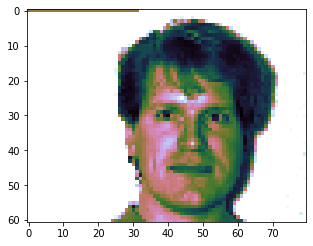

In [152]:
# Providing image path and visualizing downsampled image 
# testing on test image

path = "./data/yalefaces/subject01-test.gif"
img = plt.imread(path)
print(img.shape)

# perform simple 4x downsampling 
img_downsampled = img[::4, ::4]
#print(img_downsampled, img_downsampled.shape)
plt.figure(figsize=(5, 5))
plt.imshow(img_downsampled, cmap='cubehelix')

In [117]:
path = "./data/yalefaces"

[os.path.join(path, filename) for filename in os.listdir(path) if "subject01" in filename]

['./data/yalefaces/subject01.happy.gif',
 './data/yalefaces/subject01.rightlight.gif',
 './data/yalefaces/subject01.noglasses.gif',
 './data/yalefaces/subject01.sad.gif',
 './data/yalefaces/subject01.surprised.gif',
 './data/yalefaces/subject01.glasses.gif',
 './data/yalefaces/subject01.normal.gif',
 './data/yalefaces/subject01.wink.gif',
 './data/yalefaces/subject01.sleepy.gif',
 './data/yalefaces/subject01.leftlight.gif',
 './data/yalefaces/subject01-test.gif']

In [164]:
directory = "./data/yalefaces"
subject = 1 # a toggle to chose subject 1 or 2
M = []
for file in os.listdir(directory):
    
    #vectorizing test images for facial recognition
    if "subject01" in file and "test" in file:
        path = os.path.join(directory, file)
        data = plt.imread(path)
        data_downsampled = data[::4, ::4]
        test1 = data_downsampled.flatten()
        
    if "subject02" in file and "test" in file:
        path = os.path.join(directory, file)
        data = plt.imread(path)
        data_downsampled = data[::4, ::4]
        test2 = data_downsampled.flatten()
    
    # accumulating other images as data points 
    if subject == 1:
        if "subject01" in file and "test" not in file:
            path = os.path.join(directory, file)
            data = plt.imread(path)
            data_downsampled = data[::4, ::4]
            M.append(data_downsampled.flatten())
    if subject == 2:
        if "subject02" in file and "test" not in file:
            path = os.path.join(directory, file)
            data = plt.imread(path)
            data_downsampled = data[::4, ::4]
            M.append(data_downsampled.flatten())
            
    downsampled_shape = data_downsampled.shape
            
M = np.asarray(M)
m, n = M.shape

print(test1.shape)
print(downsampled_shape)
print(M.shape)

(4880,)
(61, 80)
(10, 4880)


In [165]:
# take average of each data point (pixel values in this case)
# no need to normalize because all pixel values lie in same range

avg = np.mean(M, axis=1)

M_minus_avg = M - avg[:,None]

# compute covarirance matrix 
C = np.dot(M_minus_avg, M_minus_avg.T) / m

k = 6
e_vals, w = eigs(C, k) # using scipy this HW because optional param k 
e_vals = e_vals.real
w = w.real

print(w.shape)

(10, 6)


(6, 4880)


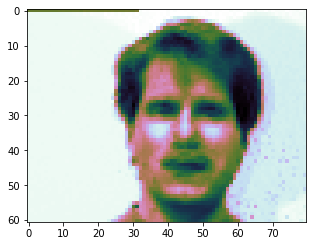

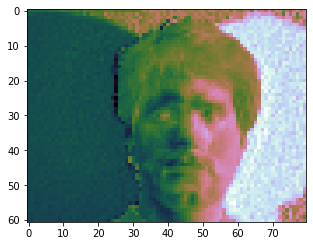

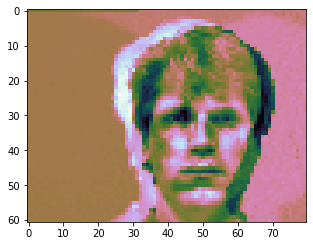

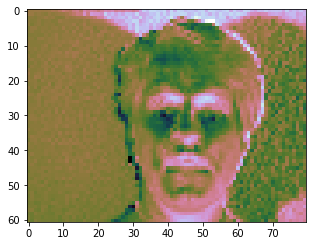

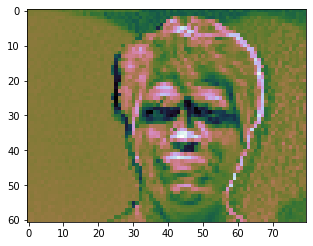

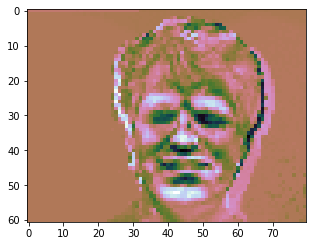

In [166]:
# extract principal components and visualize top k eigenfaces of the subject being used

z = [] 
for i in range(k):
    
    z_i = np.dot(w[:, i].T, M_minus_avg) / math.sqrt(e_vals[i]) 
    z.append(z_i)
    z_vis = z_i.reshape(downsampled_shape)
    plt.figure(figsize=(5, 5))
    plt.imshow(z_vis, cmap='cubehelix')

z = np.asarray(z)
print(z.shape)

In [168]:
# Facial recognition task 

# if test test images are mean-centered
#test1 = test1 - np.mean(test1)
#test2 = test2 - np.mean(test2)

s_ij = test2 - np.dot(np.dot(z.T, z), test2)
s_ij = np.linalg.norm(s_ij)**2

print(s_ij)

987677621.1352957